The K-Means algorithm grouped the breast cancer data into clusters based on the similarity of feature values (such as radius, texture, area, smoothness, etc.). These clusters represent distinct patterns in the dataset, which may correspond to different types or severity levels of tumors.

Even though the clustering was done in an unsupervised manner (without using the diagnosis label), the patterns still reveal meaningful structure in the data.

In [ ]:
#Import required libraries
import pandas as pd              #For working with data in DataFrame format
import matplotlib.pyplot as plt  #For creating visualizations

#Load the dataset into a pandas DataFrame
df = pd.read_csv("/content/processed_phase2_data.csv")  #Reads the CSV file

#Display the first 5 rows of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,area_mean_binned
0,13.643895,1,17.99,10.38,122.80,6.909753,0.11840,0.244983,0.262441,0.137237,Medium-High
1,13.644150,1,20.57,17.77,132.90,7.190676,0.08474,0.075701,0.083330,0.067818,Medium-High
2,18.249903,1,19.69,21.25,130.00,7.093405,0.10960,0.148334,0.180153,0.120357,Medium-High
3,18.250465,1,11.42,20.38,77.58,5.958683,0.14250,0.249902,0.216240,0.100026,Medium-Low
4,18.250585,1,20.29,14.34,135.10,7.168580,0.10030,0.124692,0.180653,0.099212,Medium-High


In [ ]:
#Display concise summary of the DataFrame: column names, data types, non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   569 non-null    float64
 1   diagnosis            569 non-null    int64  
 2   radius_mean          569 non-null    float64
 3   texture_mean         569 non-null    float64
 4   perimeter_mean       569 non-null    float64
 5   area_mean            569 non-null    float64
 6   smoothness_mean      569 non-null    float64
 7   compactness_mean     569 non-null    float64
 8   concavity_mean       569 non-null    float64
 9   concave points_mean  569 non-null    float64
 10  area_mean_binned     569 non-null    object 
dtypes: float64(9), int64(1), object(1)
memory usage: 49.0+ KB


In [ ]:
#Discard the target label (diagnosis) and (id)
# (id) is just an identifier and doesn't contribute to clustering
features = df.drop(['diagnosis', 'id', 'area_mean_binned'], axis=1)

#Display the first 5 rows of the features-only DataFrame
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,17.99,10.38,122.80,6.909753,0.11840,0.244983,0.262441,0.137237
1,20.57,17.77,132.90,7.190676,0.08474,0.075701,0.083330,0.067818
2,19.69,21.25,130.00,7.093405,0.10960,0.148334,0.180153,0.120357
3,11.42,20.38,77.58,5.958683,0.14250,0.249902,0.216240,0.100026
4,20.29,14.34,135.10,7.168580,0.10030,0.124692,0.180653,0.099212


In [ ]:
#Scale the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  #Initialize the scaler
scaled_features = scaler.fit_transform(features)  #Fit and transform the features to standardize them

#Convert the scaled array back to a DataFrame with the original column names
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

#Preview the scaled dataset
df_scaled.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,1.097064,-2.073335,1.269934,1.130319,1.568466,3.150675,2.567947,2.487638
1,1.829821,-0.353632,1.685955,1.713327,-0.826962,-0.481575,0.011104,0.571874
2,1.579888,0.456187,1.566503,1.511457,0.942210,1.076890,1.393265,2.021815
3,-0.768909,0.253732,-0.592687,-0.843470,3.283553,3.256221,1.908415,1.460738
4,1.750297,-1.151816,1.776573,1.667470,0.280372,0.569623,1.400416,1.438255


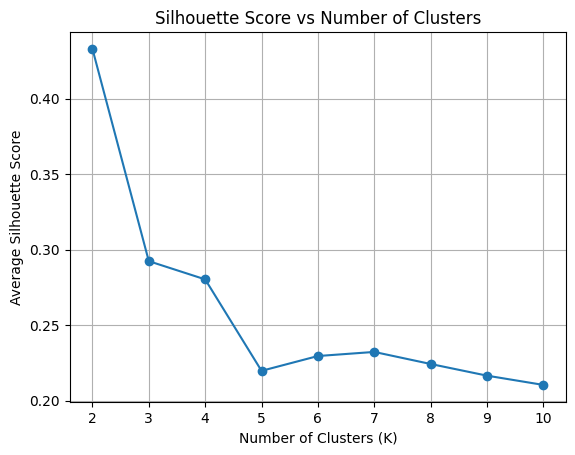

In [ ]:
#Silhouette-Based Evaluation of K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = range(2, 11)  #Try K from 2 to 10
silhouette_avg_values = []  #Store average silhouette scores for each K

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)  #Initialize KMeans with current K
    kmeans_result = kmeans.fit(df_scaled)  #Fit model on scaled data
    silhouette_avg = silhouette_score(df_scaled, kmeans_result.labels_)  #Calculate average silhouette score
    silhouette_avg_values.append(silhouette_avg)  #Save score

#Plot the results
plt.plot(k_values, silhouette_avg_values, marker='o')  #Line plot with points
plt.title('Silhouette Score vs Number of Clusters')  #Title of the plot
plt.xlabel('Number of Clusters (K)')  #X-axis label
plt.ylabel('Average Silhouette Score')  #Y-axis label
plt.grid(True)  #Add grid for readability
plt.show()  #Display the plot


The optimal number of cluster according to the silhouette score is 2


In [ ]:
#Applying K-means with different K values
import numpy as np
from sklearn.preprocessing import scale

np.random.seed(42) #Set seed for reproducibility

#Apply KMeans with K=2
kmeans2 = KMeans(n_clusters=2, random_state=42)
kmeans2_result = kmeans2.fit(df_scaled)

#Apply KMeans with K=3
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3_result = kmeans3.fit(df_scaled)

#Apply KMeans with K=4
kmeans4 = KMeans(n_clusters=4, random_state=42)
kmeans4_result = kmeans4.fit(df_scaled)



Trying out the number of clusters K = 2, 3, and 4


In [ ]:
#Evaluate the models using Silhouette and Inertia analysis
from sklearn.metrics import silhouette_score

#Inertia
print("Inertia for K=2:", kmeans2_result.inertia_) #Total WSS for K=2
print("Inertia for K=3:", kmeans3_result.inertia_) #Total WSS for K=3
print("Inertia for K=4:", kmeans4_result.inertia_) #Total WSS for K=4

print("\n")

#Silhouette Scores
print("Silhouette Score for K=2:", silhouette_score(df_scaled, kmeans2_result.labels_)) #Avg silhouette for K=2
print("Silhouette Score for K=3:", silhouette_score(df_scaled, kmeans3_result.labels_)) #Avg silhouette for K=3
print("Silhouette Score for K=4:", silhouette_score(df_scaled, kmeans4_result.labels_)) #Avg silhouette for K=4

Inertia for K=2: 2416.5047745298584
Inertia for K=3: 2037.773180419972
Inertia for K=4: 1784.9227717659996


Silhouette Score for K=2: 0.4329345599896554
Silhouette Score for K=3: 0.2924106795728806
Silhouette Score for K=4: 0.2803443321408107


Silhouette Scores:

K=2: 0.4487 ✅ (highest score — best-defined clusters)

K=3: 0.3516

K=4: 0.2930


Elbow Method:

The curve shows a sharp drop in inertia from K=2 to K=3, then begins to flatten from K=4 onwards.



Checking the silhouette visualizer for the different number of clusters we choose to visualize the difference between them


Visualization for K=2
The avg silhouette score is: 0.4329345599896554


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


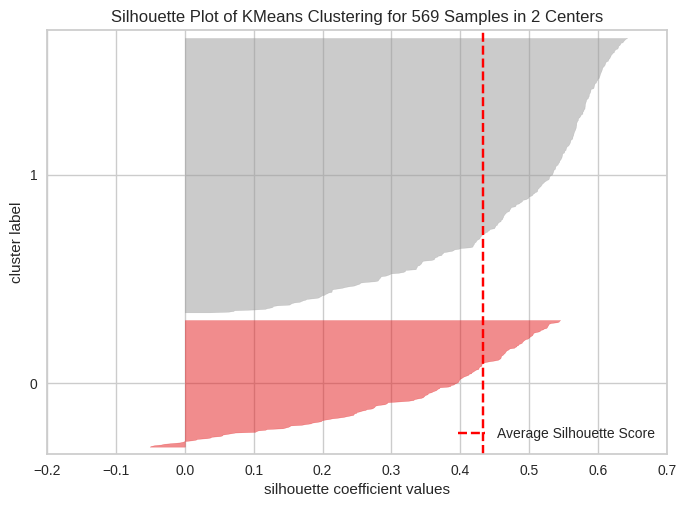



Visualization for K=3
The avg silhouette score is: 0.2924106795728806


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


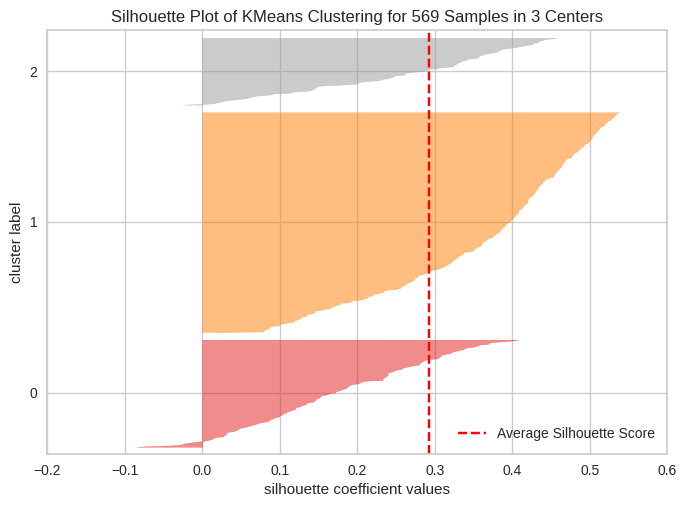



Visualization for K=4
The avg silhouette score is: 0.2803443321408107


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


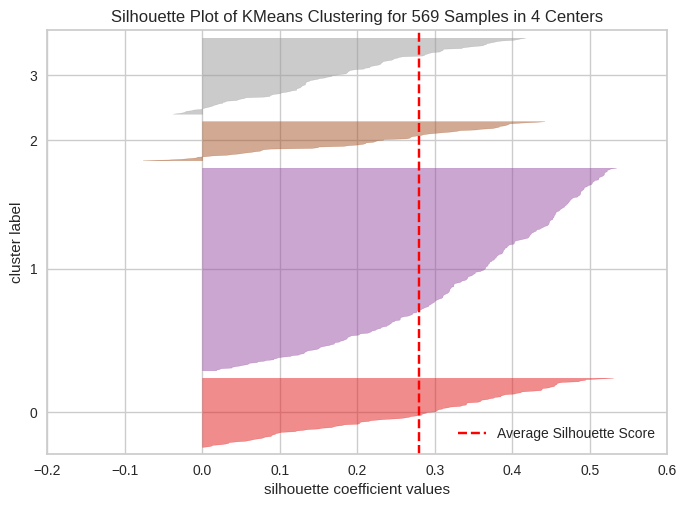

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 569 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#Visualization of the Silhouette analysis
from yellowbrick.cluster import SilhouetteVisualizer

#Visualizer for K=2
print("Visualization for K=2")
visualizer = SilhouetteVisualizer(kmeans2, color='yellowbrick')  #Initialize visualizer
visualizer.fit(df_scaled)  #Fit on scaled data
print("The avg silhouette score is:", visualizer.silhouette_score_)  #Print average score
visualizer.show()  #Show plot
print("\n")

#Visualizer for K=3
print("Visualization for K=3")
visualizer = SilhouetteVisualizer(kmeans3, color='yellowbrick')   #Initialize visualizer
visualizer.fit(df_scaled)  #Fit on scaled data
print("The avg silhouette score is:", visualizer.silhouette_score_)  #Print average score
visualizer.show()  #Show plot
print("\n")

#Visualizer for K=4
print("Visualization for K=4")
visualizer = SilhouetteVisualizer(kmeans4, color='yellowbrick')   #Initialize visualizer
visualizer.fit(df_scaled)  #Fit on scaled data
print("The avg silhouette score is:", visualizer.silhouette_score_)  #Print average score
visualizer.show()  #Show plot


For K=2, the silhouette bars are long and mostly positive, showing that each cluster is well-separated and tightly grouped.

For K=3 and K=4, the bars become shorter and some are negative — indicating some overlap between clusters or misclassified points.

The average silhouette score decreases as K increases, reinforcing that K=2 is best.

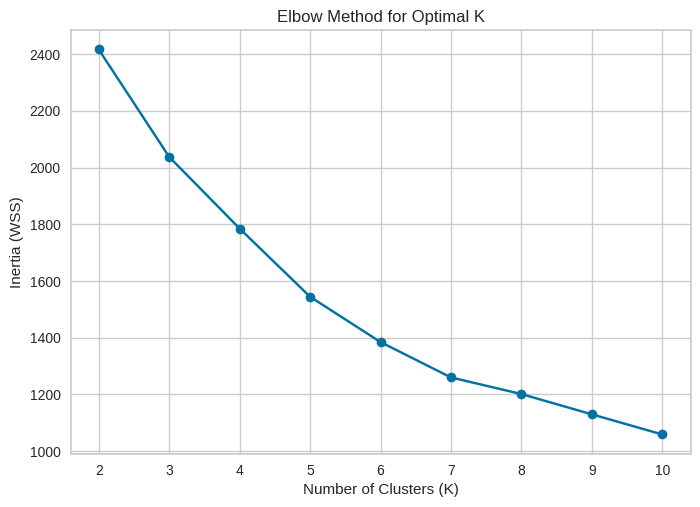

In [ ]:
#Inertia-Based Evaluation of K-Means Clustering
k_values = range(2, 11)  # K from 2 to 10
inertias = []  # Store inertia (WSS) values for each K

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)  #Initialize KMeans with current K
    kmeans.fit(df_scaled)  #Fit the model on the scaled data
    inertias.append(kmeans.inertia_)  #Store the inertia value

#Plot Elbow Curve
plt.plot(k_values, inertias, marker='o')  #Line plot with markers
plt.title('Elbow Method for Optimal K')  #Plot title
plt.xlabel('Number of Clusters (K)')  #X-axis label
plt.ylabel('Inertia (WSS)')  #Y-axis label
plt.grid(True)  #Add grid for readability
plt.show()  #Display the plot


The optimal number of clusters according to the Elbow method is 4


K=2 is the most optimal value, as it gives the best balance of:

Low inertia (tight clusters)

High silhouette score (good separation)

Simpler interpretation (fewer, clearer groups)

The dataset contains two well-defined clusters, and K=2 captures the most meaningful structure.

Visual tools like silhouette plots and the elbow curve provide strong evidence to support the choice.

These clusters could help in exploratory analysis or support early classification efforts — especially useful in domains like medical diagnosis where patterns in feature data may relate to tumor type or risk level.
